# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
**Import numpy and pandas**



**Import visualization libraries and set %matplotlib inline.**



**Read in the csv file as a dataframe called df**



**Check the info() of the df**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


# Data Cleaning

**Drop Column 'e' inplace**

In [2]:
df.drop('e',axis=1,inplace=True)

**Which features contain blank, null or empty values?**

We can check for missing values with pandas isnull(). This indicates whether values are missing or not. Then we can sum all the values to check every column.



In [3]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
dtype: int64

# Feature Engineering and Creating new Feature

**Reason feature and Title Code**

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. We are going to use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS and titile_code column value would be BACK PAINS/INJURY

In [5]:
def func1(x):
    return x.split(":")[0]

def func2(x):
    return x.split(":")[1]

df["Reason"]=df['title'].apply(func1)

df["title_code"]=df['title'].apply(func2)

df[["Reason","title_code"]].head(5)

,Reason,title_code
0,EMS,BACK PAINS/INJURY
1,EMS,DIABETIC EMERGENCY
2,Fire,GAS-ODOR/LEAK
3,EMS,CARDIAC EMERGENCY
4,EMS,DIZZINESS


In [110]:
#Other Method
#df["Reason"]=df['title'].apply(lambda x: x.split(":")[0])
#df["title_code"]=df['title'].apply(lambda x: x.split(":")[1])
#df[['Reason','title_code']].head(5)

,Reason,title_code
0,EMS,BACK PAINS/INJURY
1,EMS,DIABETIC EMERGENCY
2,Fire,GAS-ODOR/LEAK
3,EMS,CARDIAC EMERGENCY
4,EMS,DIZZINESS


**You should have seen that these timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects.**

In [6]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

**You can now grab specific attributes from a Datetime object by calling them. For example:**

time = df['timeStamp'].iloc[0]

time.hour



**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [7]:
df['Hour']=df['timeStamp'].apply(lambda x: x.hour)
df['Month']=df['timeStamp'].apply(lambda x: x.month)
df['Day of Week']=df['timeStamp'].apply(lambda x: x.day_of_week)
df[['Hour','Month','Day of Week']].head(5)

,Hour,Month,Day of Week
0,17,12,3
1,17,12,3
2,17,12,3
3,17,12,3
4,17,12,3


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
    
    
    Code:
    
    df['Day of Week']=df['Day of Week'].map(dmap)

In [8]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)
df['Day of Week'].head(5)

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: Day of Week, dtype: object

# EDA

**What is the most common Reason for a 911 call based on the Reason Column created**

The number one reason for 911 calls are Emergency Medical Services.
Almost half of the reasons are for EMS.


**Draw a seaborn countplot for each Reason**

In [9]:
df["Reason"].value_counts().idxmax()

'EMS'

<AxesSubplot: xlabel='Reason', ylabel='count'>

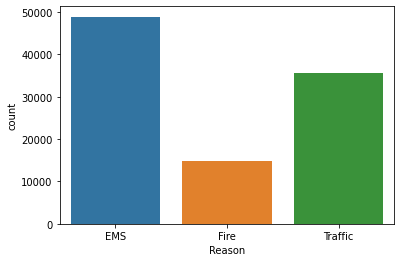

In [10]:
sns.countplot(x="Reason",data=df)

**What are the top 5 zip codes for 911 calls?**

In [11]:
ans=pd.DataFrame(df['zip'].value_counts().head(5))
ans

,zip
19401.0,6979
19464.0,6643
19403.0,4854
19446.0,4748
19406.0,3174


**What are the top 5 townships (twp) for 911 calls?**

In [12]:
ans1=pd.DataFrame(df['twp'].value_counts().head(5))

In [13]:
ans1

,twp
LOWER MERION,8443
ABINGTON,5977
NORRISTOWN,5890
UPPER MERION,5227
CHELTENHAM,4575


In [121]:
new_df=df[df["Reason"]=="EMS"]
new_df

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,title_code,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,17,12,Thu
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,EMS,HEAD INJURY,17,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99480,40.221227,-75.288737,SUMNEYTOWN PIKE & RR OVERPASS; UPPER GWYNEDD;...,NaN,EMS: DIABETIC EMERGENCY,2016-08-24 10:52:01,UPPER GWYNEDD,SUMNEYTOWN PIKE & RR OVERPASS,EMS,DIABETIC EMERGENCY,10,8,Wed
99481,40.221227,-75.288737,SUMNEYTOWN PIKE & RR OVERPASS; UPPER GWYNEDD;...,NaN,EMS: DIZZINESS,2016-08-24 10:52:01,UPPER GWYNEDD,SUMNEYTOWN PIKE & RR OVERPASS,EMS,DIZZINESS,10,8,Wed
99483,40.084465,-75.390173,DEKALB PIKE & KING OF PRUSSIA RD; UPPER MERIO...,19406.0,EMS: BACK PAINS/INJURY,2016-08-24 10:57:00,UPPER MERION,DEKALB PIKE & KING OF PRUSSIA RD,EMS,BACK PAINS/INJURY,10,8,Wed
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,EMS,FALL VICTIM,11,8,Wed


**Which were the top 5 title codes under EMS Reason that was caled for 911 Emergency**

In [122]:
new_df['title_code'].value_counts().head(5)

 RESPIRATORY EMERGENCY    5112
 CARDIAC EMERGENCY        5012
 FALL VICTIM              4863
 VEHICLE ACCIDENT         3935
 SUBJECT IN PAIN          2687
Name: title_code, dtype: int64

**Now create a simple plot off of the dataframe indicating the count of calls per month.**

<AxesSubplot: xlabel='Month'>

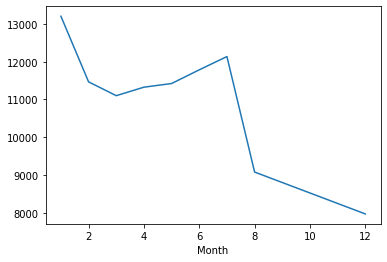

In [123]:
a=df.groupby('Month')['lat'].count()
a.plot()
